# Problem Set 5: Algorithms in Qiskit

## Instructions for the problem set

Please submit both submit a pdf copy as well as the ipynb file of your notebook. The pdf can be obtained via the option of File/Print Preview.

If you have worked on the server, you can take the following steps to download your notebook:
1) Go to myadroit.princeton.edu and enter your login credentials.

2) Go to Files/Home Directory

3) You should see a user interface that displays your home directory and your .ipynb file should also be in that directory. You can use the download option to dowload the file to your computer.

Feel free to let us know with any technical difficulties.

Chris Phenicie: phenicie@princeton.edu

Tuna Uysal:     muysal@princeton.edu

Finally, please refer to the Qiskit Tutorial for instruction on the syntax for defining registers, quantum circuits, applying gates and performing measurements.

In [334]:
'''Some generic python and jupyter imports'''
import numpy as np
from numpy import pi,sqrt
from sympy import Matrix
import matplotlib.pyplot as plt 


'''Qiskit imports'''
from qiskit import(
    QuantumCircuit
    , execute
    , Aer
    , ClassicalRegister
    , QuantumRegister
    , assemble
)
backend_svec = Aer.get_backend('statevector_simulator')
backend_qasm = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram, plot_distribution

In [335]:
# make sure to run these functions to use in the Problem 2!

def dot_mod_2(b, z):
    """ Take the dot product mod two of two bit strings b and z 
    
    Args:
        b (str): A binary bit string
        z (str): A binary bit string with the same length as b
        
    Returns:
        (int): The dot product mod 2 of b and z
    """
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

# basic example
b = '10'
z = '01'
print('Dot product of {0} and {1}:'.format(b,z))
print(dot_mod_2(b, z))

def num_to_bin_str(num, length_of_str):
    """ Return the binary string representation of a number 
    
    Args:
        num (int): the number to convert to a binary string
        length_of_str (int): the length of the string
        
    Returns:
        (str) the representation of num in binary
    """
    
    return format(num, '0%ib' %length_of_str)

# basic example
decNumber = 3
nBits = 6
print('Binary representation of {0} using {1} bits:'.format(decNumber,nBits))
print(num_to_bin_str(decNumber, nBits)) # Write the number 3 in binary, with leading zeros to make the total string length 6

Dot product of 10 and 01:
0
Binary representation of 3 using 6 bits:
000011


# Problem 1: Deutsch-Jozsa

In this problem, we will implement and test the Deutsch-Jozsa algorithm for two functions of the form $f:\{0,1\}^3\rightarrow\{0,1\}$, which takes a bitstring of length three as input and outputs either 0 or 1 for each of the inputs. The functions that we will consider are either constant (same output for all inputs) or balanced (output 0 for half the inputs and 1 for the remaining half). Applying the Deutsch-Jozsa algorithm on these functions will let us determine the type of function.

Let us go over the implementation in parts, starting with the initialization of the qubits in our circuit. For the function described above, how many qubits do you need in total for your circuit?

**We should need 4 total qubits. Three for the input and measurement. Then another qubit for phase kickback stuff.**

At the start of the algorithm all qubits need to be initialized to $|0\rangle$ except for the last one, which should be initialized to $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$. Implement a circuit below that is initialized as such. Note that all qubits are initialized to $|0\rangle$ by default in Qiskit.

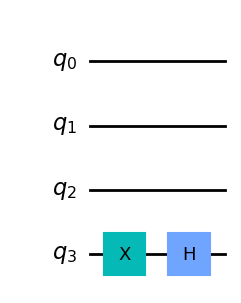

In [336]:
# You have two options to initialize your last qubit
# 1) use the initialize() function as described in the tutorial
# 2) apply the correct gate(s) to transfer it from |0> to |->
# number of input bits of our function
n = 3
# enter the correct total number of qubits for the circit
size = 4
# create a quantum register with the appropriate number of qubits
q = QuantumRegister(size,'q')
# create a quantum circuit using the register
qc_init = QuantumCircuit(q)
# use initialize() or apply appropriate gate(s) for the last qubit below
qc_init.x(size-1)
qc_init.h(size-1)




# draw the circuit
qc_init.draw(output = 'mpl')

After we have initialized our state, we will apply a set of Hadamard gates to create an equal superposition of the three qubit inputs to the quantum oracle.

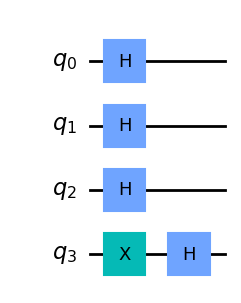

In [337]:
# iterate over the input qubits, applying the Hadamard gate to each
for i in range(n):
    qc_init.h(q[i])

# draw the circuit
qc_init.draw('mpl')

Now, we are ready to use an oracle function! First, we will need to define it. For a binary function $f:\{0,1\}^n\rightarrow\{0,1\}$ with $n$ input bits and 1 output bit, the quantum oracle should perform the following action:

$$
U_f:|x\rangle|y\rangle\rightarrow |x\rangle|y\oplus f(x)\rangle
$$

Note that both y and f(x) are single bits for this function.

In this part, implement two oracles corresponding to the constant and balanced functions, $f_c(x)$ and $f_b(x)$ defined below.

The constant function, $f_c(x)$, gives 1 for all three bit inputs $x$.

| $x$ | $$f_c(x)$$ |
|-|-|
| 000 | 1 |
| 001 | 1 |
| 010 | 1 |
| 011 | 1 |
| 100 | 1 |
| 101 | 1 |
| 110 | 1 |
| 111 | 1 |

The truth table for the balanced function, $f_b(x)$, is defined below.

| $x$ | $$f_b(x)$$ |
|-|-|
| 000 | 1 |
| 001 | 0 |
| 010 | 1 |
| 011 | 0 |
| 100 | 0 |
| 101 | 1 |
| 110 | 0 |
| 111 | 1 |

Using X and CNOT operations, form the corresponding quantum oracles. To be clear, we are only asking you to implement it for the functions defined above and not for any arbitrary function!

Hint: You might find it helpful to consider the effect of flipping one bit on the output or to write down the truth table for the unitary operation.

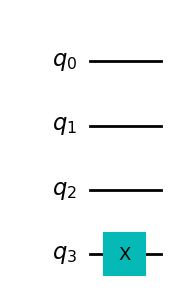

In [338]:
# we will define the quantum oracles in a new circuit and later add it to the previous circuit

# implement the constant oracle defined above

# create a quantum circuit using the register
constant_oracle = QuantumCircuit(q)
constant_oracle.x(q[3])
               

# apply the appropriate gates to implement the constant oracle below






constant_oracle.draw('mpl')

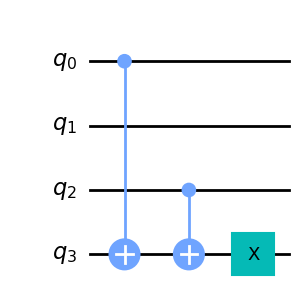

In [339]:
# implement the balanced oracle defined above

# create a quantum circuit using the register
balanced_oracle = QuantumCircuit(q)

# apply the appropriate gates to implement the balanced oracle belo
balanced_oracle.cx(0,3)
balanced_oracle.cx(2,3)
balanced_oracle.x(3)







balanced_oracle.draw('mpl')

Now let us also define the last block of the circuit, which includes another set of Hadamard gates followed by measurement.  Here we will need to add a 3-bit classical register to read out the qubit states at the end.

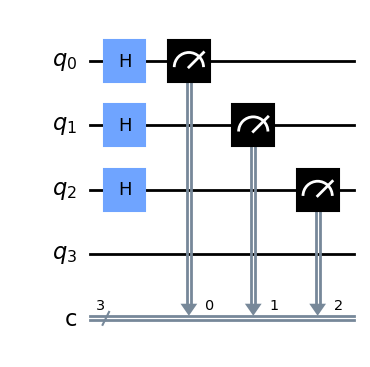

In [340]:
# let us form our classical register of 3 bits
c = ClassicalRegister(n,'c')

# we pass both the quantum register q and the classical register c as arguments for the last part of the circuit
qc_end = QuantumCircuit(q,c)

# add Hadamard gates to the first n qubits
for i in range(n):
    qc_end.h(q[i])
    
# measure each of the first n qubits and store the information in the corresponding classical register
for i in range(n):
    qc_end.measure(q[i],c[i])

qc_end.draw('mpl')

Now we are ready to finish and test each circuit. Let us start with the constant oracle.

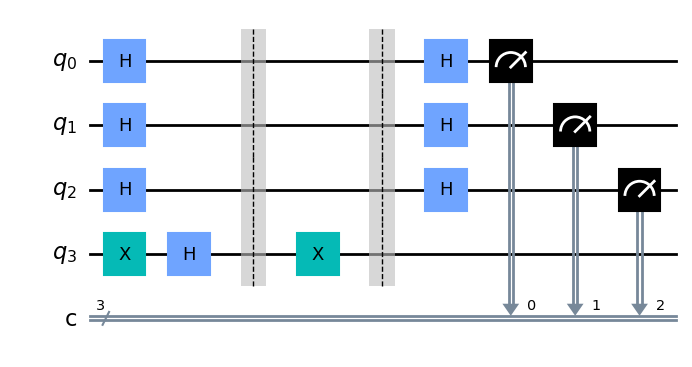

In [341]:
constant_full_circuit = QuantumCircuit(q,c)
# add on the first part of the circuit
constant_full_circuit = constant_full_circuit.compose(qc_init)
# add a barrier for visual clarity (no effect on the code)
constant_full_circuit.barrier()
# add on the constant oracle
constant_full_circuit = constant_full_circuit.compose(constant_oracle)
# add a barrier for visual clarity
constant_full_circuit.barrier()
# add on the final part of the circuit
constant_full_circuit = constant_full_circuit.compose(qc_end)

constant_full_circuit.draw('mpl')

What is the minimum number of times you need to execute this circuit in order to infer whether your function is constant or balanced?

**We should only have to execute this circuit once to determine whether the function is constant or balanced**

Run the constant oracle circuit.

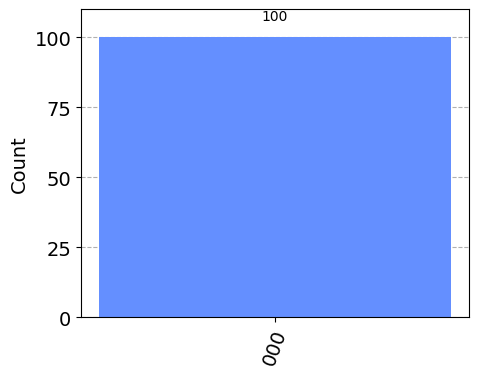

In [342]:
# enter the minimum number of trials needed
nShots = 100

# perform constant_full_circuit just 1 time and plot the histogram of states!
res = execute(constant_full_circuit, backend_qasm,shots=nShots).result()
counts = res.get_counts();
plot_histogram(counts, figsize=(5,4))

Is your result consistent with $f_c(x)$?

**Yes, this is consistent with $f_c(x)$ since we received the 000 state back with 100% probability, indicating the function must be constant**

Now implement and execute the circuit with the balanced oracle.

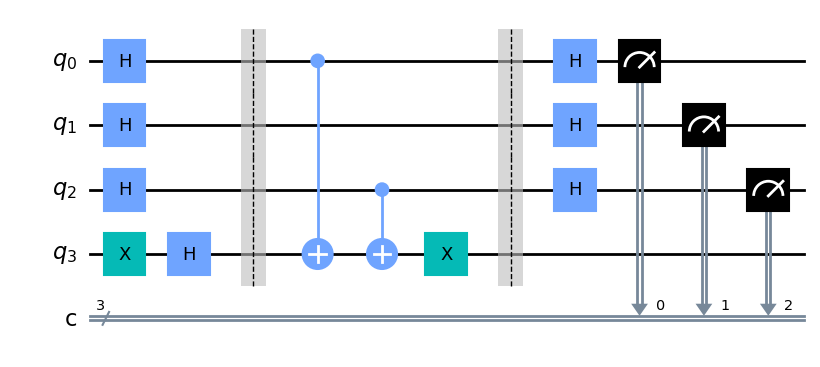

In [343]:
# implement your balanced oracle circuit using the parts defined earlier below
balanced_full_circuit = QuantumCircuit(q,c)
# add on the first part of the circuit
balanced_full_circuit = balanced_full_circuit.compose(qc_init)

balanced_full_circuit.barrier()
# add on the constant oracle
balanced_full_circuit = balanced_full_circuit.compose(balanced_oracle)
# add a barrier for visual clarity
balanced_full_circuit.barrier()
# add on the final part of the circuit
balanced_full_circuit = balanced_full_circuit.compose(qc_end)

balanced_full_circuit.draw('mpl')



# draw your circuit


Run the constant oracle circuit.

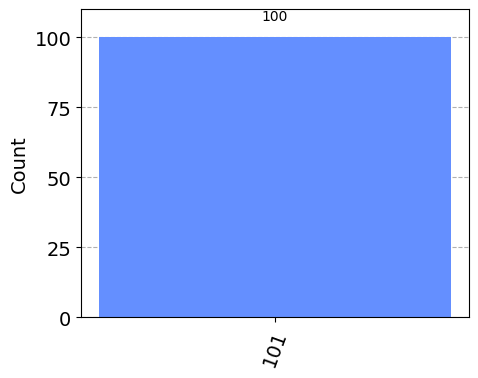

In [344]:
# execute the circuit defined above
nShots = 100

# perform constant_full_circuit just 1 time and plot the histogram of states!
res = execute(balanced_full_circuit, backend_qasm,shots=nShots).result()
counts = res.get_counts();
plot_histogram(counts, figsize=(5,4))


Is your result consistent with $f_b(x)$?

**Yes this is consistent with $f_b(x)$ since we got a non all zero state as our answer, indicating the function must be balanced**

# Problem 2: Simon's algorithm

## 2a: Implementing Simon's algorithm

### 2a (i): Define f(x)

Write a truth table for a binary function $f:\{0,1\}^2\rightarrow \{0,1\}^2$ that has the property $f(\mathbf{x}) = f(\mathbf{x} + \mathbf{s})$ for the binary bit string $\mathbf{s} = 10$

| $x$ | $$f(x)$$ |
|-|-|
| 00 | 01 |
| 01 | 10 |
| 10 | 01 |
| 11 | 10 |

### 2a (ii): Define $U_f$

Write the truth table for the circuit that implments $U_f$ for Simon's problem. Note that for the function above, this is a 4 qubit unitary.

| $input$ | $$U_f(input)$$ |
|-|-|
| 0000 | 0001 |
| 0100 | 0110 |
| 1000 | 1001 |
| 1100 | 1110 |

### 2a (iii): Implement $U_f$ in Qiskit and draw the circuit

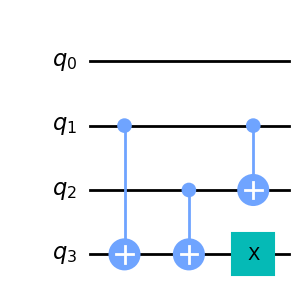

In [345]:
# Define the empty QuantumCircuit with 4 qubits
simon_oracle = QuantumCircuit(4)
simon_oracle.cx(1,3)
simon_oracle.cx(2,3)
simon_oracle.x(3)
simon_oracle.cx(1,2)
# Implement the oracle circuit you described in 2a (ii)
simon_oracle.draw('mpl')
# Draw

### 2a (iv): Implement the entire Simons algorithm in Qiskit and draw the circuit

/var/folders/57/15j825g52f9dkn7hff7bjbl40000gn/T/ipykernel_17116/2463396339.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit+=simon_oracle


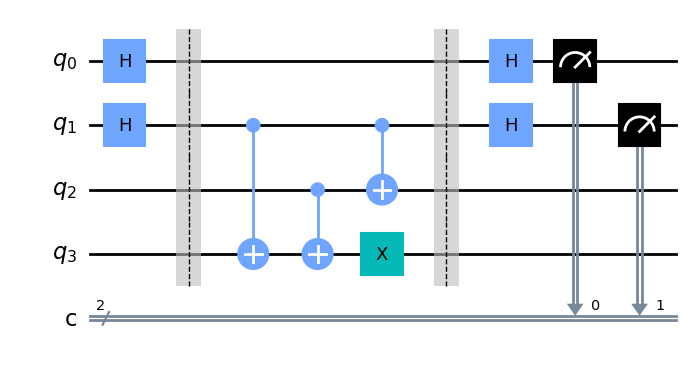

In [346]:
# Make the empty quantum circuit that has 4 qubits and 2 classical bits.
simon_circuit = QuantumCircuit(4, 2)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(2))
    
# Apply barrier for visual separation
simon_circuit.barrier()

# Add the oracle computation to the circuit. if c1 and c2 are both quantum circuits, you can append c2 to c1 using c1 += c2
# So, if you called your circuit in 2a (iii) 'oracle', and the circuit in this cell 'sc', this line would be sc += oracle
simon_circuit+=simon_oracle

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(2))
simon_circuit.measure([0,1],[0,1])
# Measure qubits

# Draw
simon_circuit.draw('mpl')

### 2a (v): Show that the output gives the hidden string s = 10

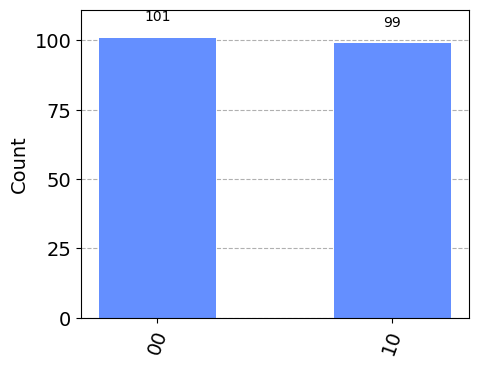

In [347]:
# Simulate your circuit (using the 'execute' function) using the simulator Aer.get_backend('qasm_simulator'). 1024 shots should be sufficient

# Get results using the .result().get_counts() functions

# Plot the histogram using the plot_histogram function
nShots = 200
res = execute(simon_circuit, backend_qasm,shots=nShots).result()
counts = res.get_counts();
plot_histogram(counts, figsize=(5,4))

In [348]:
# The output of the .result.get_counts() function is a python dictionary, like the variable device_counts defined below.
# Note that you can retrieve the list of states in the above histogram using the .keys() function, as shown below:

list(counts.keys())

['10', '00']

Show that these outputs give the hidden string $\mathbf{s}$ = 10 by showing the a dot product (mod 2) of all the recorded circuit outputs is 0. We have provided a helper function that will calculate the dot product for you. (**Remember, Qiskit reverses the ordering of the bits compared to the convention used in class.** One way to get around this is to compare the bit strings with the reverse of our known bit string. That is, take the dot product of each of the above states with the string '01')

In [349]:
# You may want to use the dot_mod_2() function defined at the top of this notebook
dot_prod = 0
for string in counts.keys():
    dot_prod+=dot_mod_2(string,'01')
print(dot_prod)

#to show that the linear equations we find from the dot product actually yield our string:
counts = res.get_counts();
strings = []
for key in counts.keys():
    strings.append([int(n) for n in key])

matrix = Matrix(strings)
augmented_matrix = matrix.rref(iszerofunc=lambda x: x % 2==0)
augmented_matrix = augmented_matrix[0].applyfunc(lambda x: x%2)
answer_data = augmented_matrix.nullspace()[0]

hidden_string = ''
for s in answer_data:
    hidden_string += str(s%2)
print ('Hidden string: ' + hidden_string)

0
Hidden string: 01


## 2b: Find the hidden string

You should have a circuit that can solve Simon's problem for the specific 2-qubit oracle defined in part a. In part b, we will work with a 6-qubit oracle. You are given the circuit implementation of the oracle below. Your job is to make the circuit for Simon's algorithm using this 6-qubit oracle, and use the output of the algorithm to determine the 6-bit string hidden in this oracle

In [350]:
# The oracle is defined as follows
n = 6

x = QuantumRegister(n, 'x')
b = QuantumRegister(n, 'b')
oracle = QuantumCircuit(x, b)

for i in range(n):    
    oracle.cx(x[i], b[i])
    
for i in range(n):
    if i%2 == 1:
        oracle.cx(x[1], b[i])

### 2b (i): Implement the Simon's algorithm circuit with the above oracle and draw the circuit

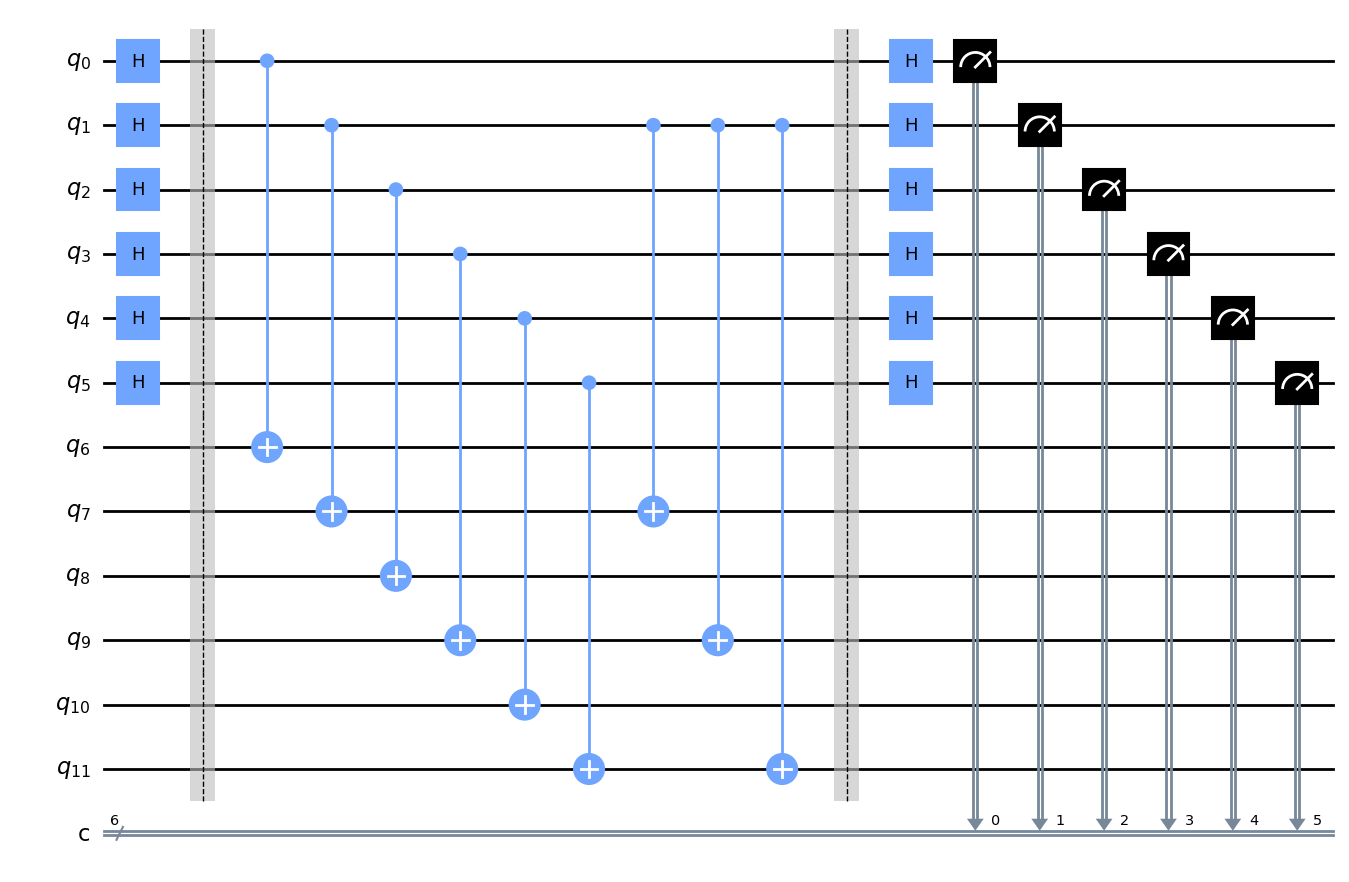

In [351]:
# Code to implement and draw the circuit. Make sure to draw the circuit to get credit!
sc = QuantumCircuit(12,6)
sc.h(range(6))
sc.barrier()
sc.compose(oracle, inplace=True)
sc.barrier()
sc.h(range(6))
sc.measure(range(6),range(6))

sc.draw('mpl')

### 2b (ii): Determine the hidden string


In [357]:
# Code to determing the hidden string (you can solve this using your code for problem 2b (iii), 
# but make sure to print your answer here to get credit)


res = execute(sc, backend_qasm,shots=500).result()
counts = res.get_counts();
strings = []
for key in counts.keys():
    strings.append([int(n) for n in key])

matrix = Matrix(strings)
augmented_matrix = matrix.rref(iszerofunc=lambda x: x % 2==0)
augmented_matrix = augmented_matrix[0].applyfunc(lambda x: x%2)
answer_data = augmented_matrix.nullspace()[0]

hidden_string = ''
for s in answer_data:
    hidden_string += str(s%2)
print ('Hidden string: ' + hidden_string)
print('Reversed string ' + hidden_string[::-1])

#checking whether the above actually works

dot_product = 0
for key in counts.keys():
    if dot_mod_2(hidden_string, key) != 0:
        print('Dot product of {0} and {1}:'.format(hidden_string,key), dot_mod_2(hidden_string, key))
    dot_product += dot_mod_2(hidden_string, key)
print(dot_product)
    



Hidden string: 101010
Reversed string 010101
0


/opt/homebrew/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


### 2b (iii) Estimate the average number of steps needed to determine the string (assume $\mathbf{s} \neq \mathbf{0}$)

To make this estimation, implement an algorithm of the following form:

1) Execute the circuit with a single-shot and record the outcome in a list.

2) Check if the collected outcomes is sufficient to determine the hidden bitstring.

3) If not sufficient, repeat steps 1) and 2).

4) Return the total number of executions


Apply this algorithm 500 times and average over the number of executions it took to find the hidden bitstring each time.

In [359]:
# Your code here


total_executions = []
for i in range(100):
    guessed_string = ''
    num_executions = 0
    counts = {}
    while (guessed_string != hidden_string):
        res = execute(sc, backend_qasm,shots=1).result()
        counts.update(res.get_counts())
        strings = []
        for key in counts.keys():
            strings.append([int(n) for n in key])

        matrix = Matrix(strings)
        augmented_matrix = matrix.rref(iszerofunc=lambda x: x % 2==0)
        augmented_matrix = augmented_matrix[0].applyfunc(lambda x: x%2)
        answer_data = augmented_matrix.nullspace()[0]
        guessed_string = ''
        for s in answer_data:
            guessed_string += str(s%2)
        num_executions += 1
#My computer won't actually run this enough times and the execute method randomly stops working at an arbitary iteration. I can get it for 100 runs occassionally 
# which I will print below
    total_executions.append(num_executions)
print(sum(total_executions)/100)





5.52


### 2b (iv): What is the theoretically minimum number of steps needed? (assume $\mathbf{s} \neq \mathbf{0}$)

**The theoretical minimum is n-1 = 5 steps since we have a string of length 6, meaning we would theoretically need 6 orthogonal strings to our desired hidden string, but one of these strings is always the 0 string, so we can disregard this get our answer in 5 steps.**

# Problem 3: Implememtation of a 7-qubit Grover's algorithm

You might recall that in Grover's algorithm, you start with the initial state of $H^{\otimes n} |0\rangle^{\otimes n}$, which is an equal superposition of all the $2^n$ computational basis states ($H$ being the single-qubit Hadamard gate; $\otimes n$ indicating a tensor product of the states of all $n$ qubits). In this particular problem, we set $\textbf{n=7}$

Also, recall that owing to phase kickback, a controlled $U_{f(\vec{x})}$ gate acting on an ancilla qubit $|-\rangle$ and controled by the $n$-qubit state $|\vec{x}\rangle $ can be written as:
$$ |\vec{x}\rangle |-\rangle \xrightarrow{U_{f(\vec{x})}} (-1)^{f(\vec{x})}|\vec{x}\rangle |-\rangle$$ 
Therefore, in this problem, we will just ignore the ancilla qubit $|-\rangle$ entirely and work only with the $n$ qubits in the computational basis:
$$ U_{f(\vec{x})}: |\vec{x}\rangle \longrightarrow (-1)^{f(\vec{x})}|\vec{x}\rangle $$

<div>
<img src="attachment:Grover_sketch.png" width="500"/>
</div>

$\normalsize{\textbf{3a)}}$ Design a oracle that marks the $|0001000\rangle$ state (in the computational basis).

In other words, you will design a circuit on $n=7$ qubits that has computational states as its eigenstates, returns a $-1$ eigen value for the $|0001000\rangle$ state, and $+1$ eigen value for all other computational states.

$\textbf{Output}$: Draw the circuit

Hint: You may need to use the multi-controlled Toffoli gate or multi-controlled X gate; syntax: qc.mct([list of control qubits],target qubit)

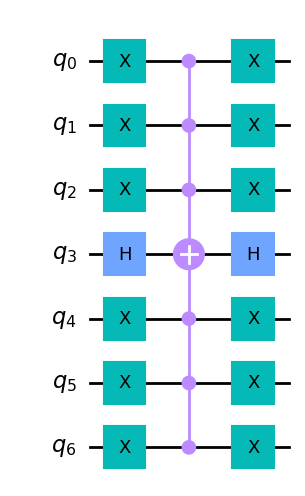

In [ ]:
""" 3a"""

# store the final circuit in the parameter: orac_circ """
#########################
# Write your answer here
orac_circ = QuantumCircuit(7)


orac_circ.x([0,1,2,4,5,6])
orac_circ.h(3)
orac_circ.mct([0,1,2,4,5,6], 3)
orac_circ.h(3)
orac_circ.x([0,1,2,4,5,6])



#########################

orac_circ.draw('mpl')

$\normalsize{\textbf{3b)}}$ Construct a 7-qubit diffusion operator for Grover's algorithm

$\textbf{Output}$: Draw the circuit

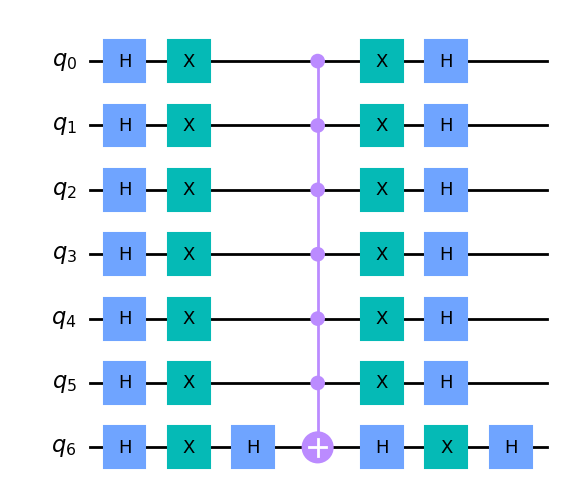

In [ ]:
""" 3b"""

# store the final circuit in the parameter: diff_circ """
#########################
# Write your answer here
diff_circ = QuantumCircuit(7)
diff_circ.h(range(7))
diff_circ.x(range(7))
diff_circ.h(6)
diff_circ.mct([0,1,2,3,4,5],6)
diff_circ.h(6)
diff_circ.x(range(7))
diff_circ.h(range(7))
#########################

diff_circ.draw('mpl')

$\normalsize{\textbf{3c)}}$ Putting everything together: initialize qubits appropriately, add $\textbf{a single instance}$ of the oracle and the diffusion operator, insert measurement operators, and execute the circuit.

$\textbf{Output}$: Draw the circuit and plot the histogram of counts

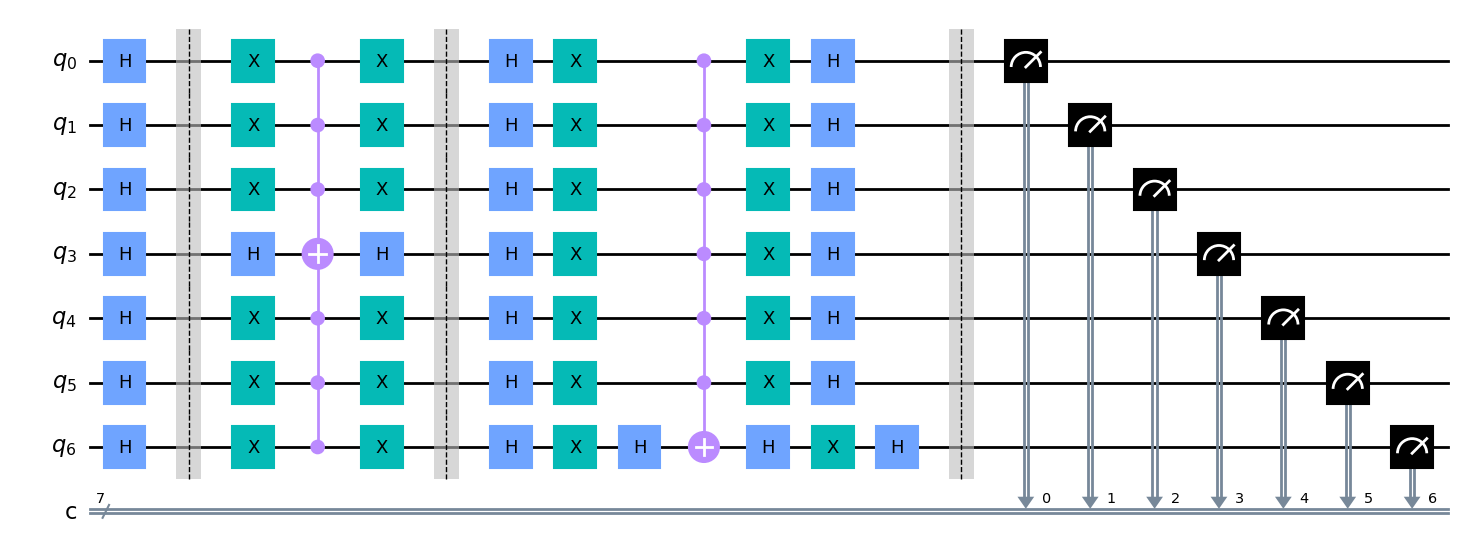

In [ ]:
""" 3c - draw the circuit """

# store the final circuit in the parameter: grov_circ """
#########################
# Write your answer here
grov_circ = QuantumCircuit(7,7)
grov_circ.h(range(7))
grov_circ.barrier()
grov_circ.compose(orac_circ, inplace = True)
grov_circ.barrier()
grov_circ.compose(diff_circ, inplace = True)
grov_circ.barrier()
grov_circ.measure(range(7), range(7))


#########################

grov_circ.draw('mpl')

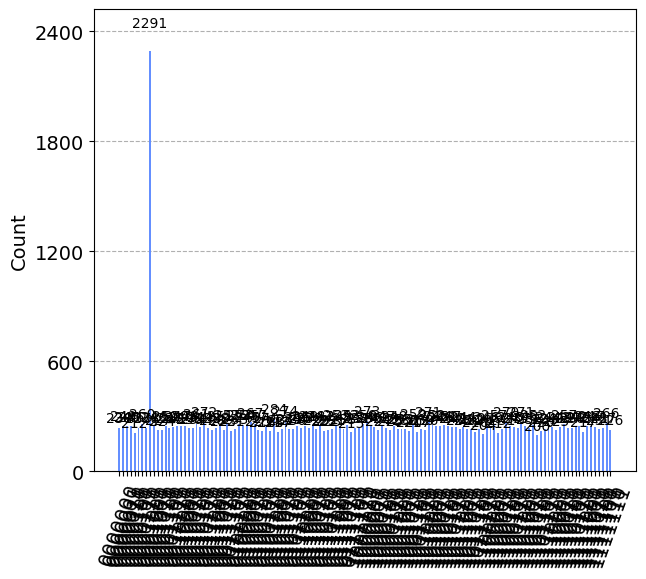

In [ ]:
""" 3c - plot the histogram of results """

# You may execute the code for a decent nubmers of "shots"; something like 2**15 should be good

#########################
# Write your answer here
res = execute(grov_circ, backend_qasm,shots = 2**15).result()
counts = res.get_counts();
plot_histogram(counts, figsize=(7,6))
#########################


$\normalsize{\textbf{3d)}}$ Compute the probability of measuring the marked state from the analytical expression (for a single instance of Grover's oracle & diffusion operator). Does the numerically extracted value (from prob. 2c) agree with the analytically computed value? From the analytical expression, estimate the number of repititions of the Grover's oracle & diffusion operator needed to maximize the probability of measuring the marked state.

In [ ]:
""" 3d"""

#########################
# Write your answer here

analytic_val = np.sin(3*np.arcsin(1/sqrt(2**7)))**2 #probability after one grover iteration
numeric_val = 2291/2**15
number_of_repeat = 8 #based on analytical probability formula which is np.sin((2k+1)*np.arcsin(1/sqrt(2**7)))**2 for k iterations

print("Analytically est. prob. of measuring the marked state: ", analytic_val )
print("Numerically est. prob. of measuring the marked state: ",  numeric_val )
print("Num. of repetitions needed to maximize prob. of measuring the marked state: ", number_of_repeat )

#########################


Analytically est. prob. of measuring the marked state:  0.06885528564453122
Numerically est. prob. of measuring the marked state:  0.069915771484375
Num. of repetitions needed to maximize prob. of measuring the marked state:  8


$\normalsize{\textbf{3e)}}$ Numerically evalute the probability of measuring the marked state as a function of the number of reptitions of Grover's oracle & diffusion operator. Vary the number of repetions from 0 to 20. You might want to start from prob. 2c and add multiple instances of the oracle and diffusion operator. Also, compare your numerical results to the oscillatory behavior expected from the analytical expression.

$\textbf{Output}$: A 2D plot of the probability vs. the numbers of repetitions. Also, overlay a 2D plot of analytically evaluated probability.

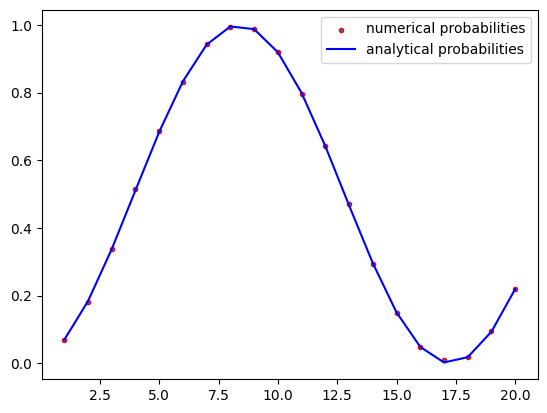

In [ ]:
""" 3e """

# You may execute the code for a decent nubmers of "shots"; something like 2**15 should be good

#########################
import matplotlib.pylab as plt
# Write your answer here
def grover_circ(grover_iterations):
    grover_circ = QuantumCircuit(7,7)
    grover_circ.h(range(7))
    grover_circ.barrier()
    for i in range(grover_iterations):
        grover_circ.compose(orac_circ, inplace = True)
        grover_circ.barrier()
        grover_circ.compose(diff_circ, inplace = True)
        grover_circ.barrier()
    grover_circ.measure(range(7), range(7))
    return grover_circ




data = {}
analytical_prob = []
for i in range(0, 20):
    res = execute(grover_circ(i+1), backend_qasm,shots = 2**15).result()
    counts = res.get_counts(); 
    marked_state = max(counts.values())
    # print(marked_state)

    key_list = list(counts.keys())
    val_list = list(counts.values()) 
    position = val_list.index(marked_state)
    # print(key_list[position])

    probability = float(marked_state/(2**15))
    data[i+1] = probability
    analytical_prob.append(np.sin((2*(i+1) + 1)*np.arcsin(1/sqrt(2**7)))**2)

# print(data)

fig=plt.figure()
# ax=fig.add_subplot(111)
# plt.subplot(1, 2, 1)
plt.scatter(data.keys(),data.values(), marker = '.', edgecolor = 'r', label='numerical probabilities')
plt.plot(data.keys(), analytical_prob, 'b', label = 'analytical probabilities')
plt.legend()
plt.show()

#########################
